In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

# lecture csv

In [5]:
df = pd.read_csv('vol.csv')

In [6]:
df

,prix,compagnie,depart,arrivee,Duree_vol,heure_depart,heure_arrivee,type_vol
0,30€,easyJet,LTN,CDG,1h 15m,18:40,20:55,Direct
1,34€,easyJet,LTN,CDG,1h 15m,7:15,9:30,Direct
2,100€,Air France,LHR,CDG,1h 20m,19:45,22:05,Direct
3,104€,British Airways,LGW,ORY,1h 10m,9:50,12:00,Direct
4,104€,British Airways,LGW,ORY,1h 10m,20:25,22:35,Direct
...,...,...,...,...,...,...,...,...
138,1 732€,Plusieurs compagnies,LCY,CDG,6h 50m,8:10,16:00,"1 escale, FRA"
139,1 955€,Plusieurs compagnies,LHR,CDG,4h 0m,6:55,11:55,"1 escale, ZRH"
140,2 659€,Austrian Airlines,LHR,CDG,18h 25m,12:00,7:25+1,"1 escale, EWR"
141,3 032€,Air Canada,LHR,CDG,17h 55m,15:00,9:55+1,"1 escale, YYZ"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prix           142 non-null    object
 1   compagnie      142 non-null    object
 2   depart         142 non-null    object
 3   arrivee        142 non-null    object
 4   Duree_vol      142 non-null    object
 5   heure_depart   142 non-null    object
 6   heure_arrivee  142 non-null    object
 7   type_vol       142 non-null    object
dtypes: object(8)
memory usage: 9.1+ KB


In [8]:
vols = df[['depart','arrivee','compagnie','Duree_vol','prix','heure_depart','heure_arrivee','type_vol']]

vols


,depart,arrivee,compagnie,Duree_vol,prix,heure_depart,heure_arrivee,type_vol
0,LTN,CDG,easyJet,1h 15m,30€,18:40,20:55,Direct
1,LTN,CDG,easyJet,1h 15m,34€,7:15,9:30,Direct
2,LHR,CDG,Air France,1h 20m,100€,19:45,22:05,Direct
3,LGW,ORY,British Airways,1h 10m,104€,9:50,12:00,Direct
4,LGW,ORY,British Airways,1h 10m,104€,20:25,22:35,Direct
...,...,...,...,...,...,...,...,...
138,LCY,CDG,Plusieurs compagnies,6h 50m,1 732€,8:10,16:00,"1 escale, FRA"
139,LHR,CDG,Plusieurs compagnies,4h 0m,1 955€,6:55,11:55,"1 escale, ZRH"
140,LHR,CDG,Austrian Airlines,18h 25m,2 659€,12:00,7:25+1,"1 escale, EWR"
141,LHR,CDG,Air Canada,17h 55m,3 032€,15:00,9:55+1,"1 escale, YYZ"


# valeurs manquantes par colonne

<AxesSubplot:>

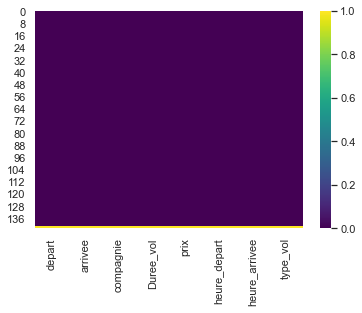

In [9]:

missing_values = vols.isnull()
sns.heatmap(data=missing_values, cmap='viridis')

In [11]:
vols['type_vol'].value_counts()

1 escale, AMS    23
Direct           16
1 escale, FRA    14
1 escale, MAD    11
1 escale, LIS     9
1 escale, BCN     9
1 escale, ZRH     8
1 escale, DUB     8
1 escale, MUC     5
1 escale, CPH     4
1 escale, IST     4
1 escale, LIN     3
1 escale, VIE     3
1 escale, LUX     3
1 escale, WAW     2
1 escale, RIX     2
1 escale, OPO     2
1 escale, MLA     2
1 escale, GVA     2
1 escale, ARN     1
1 escale, YYZ     1
1 escale, BEG     1
1 escale, EWR     1
1 escale, ATH     1
1 escale, ZAG     1
1 escale, SOF     1
1 escale, FCO     1
1 escale, HAM     1
1 escale, BRU     1
1 escale, MXP     1
1 escale, HEL     1
Name: type_vol, dtype: int64

# y a t il plus d arrvee à orly ou CDG?

In [13]:
vols['arrivee'].value_counts()

 CDG    105
 ORY     37
Name: arrivee, dtype: int64

<ipython-input-18-008f1e727448>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0.5, 1.0, ' y a t il plus d arrvee à orly ou CDG')

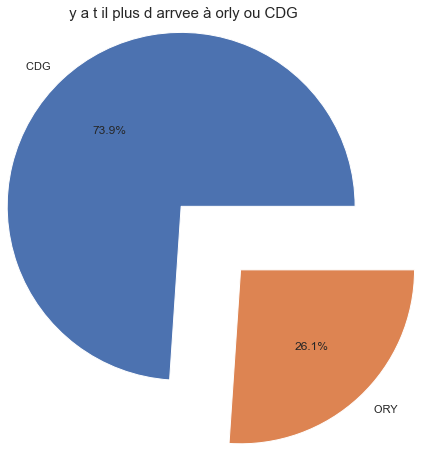

In [18]:
vols['arrivee'].value_counts().plot.pie(radius = 2, autopct='%1.1f%%', explode=(0,1), startangle=0)
plt.axes().set_ylabel('')
plt.title(' y a t il plus d arrvee à orly ou CDG?', pad = 80, fontsize = 15)

In [30]:
#nb de prix de vol par tranche de prix
vols['prix'].value_counts()

124€      5
132€      5
145€      5
104€      4
131€      4
         ..
111€      1
185€      1
3 032€    1
34€       1
90€       1
Name: prix, Length: 90, dtype: int64